In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Train = pd.read_csv(r'/Users/saurabh/Desktop/LoanPrediction/train_ctrUa4K.csv')
Test = pd.read_csv(r'/Users/saurabh/Desktop/LoanPrediction/test_lAUu6dG.csv')
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
# Shapes of Training and Testing Datasets
print("Train :", Train.shape)
print("Train :", Test.shape)

Train : (614, 13)
Train : (367, 12)


In [5]:
# Let's check if there is any duplicated record in the training set
Train.duplicated().sum()

0

In [6]:
print("Train :", Train.info(),"\n")
print("Test :", Test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
Train : None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 co

#### So we observed that there are 614 records in the Training Dataset and 367 records in the Testing Dataset.
Training Dataset has Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area and Loan_status as object types. Object type in pandas is similar to strings. ApplicantIncome field is of integer type. The other three fields namely CoapplicantIncome, Loan_Amount_Term and Credit_History are floating point type.

Testing Dataset is also very similar to Training, except the fact that CoapplicantIncome is of Integer Type. And there is no column as Loan_status since thats what we have to predict by creating a model.

#### Univariate Analysis
Univariate Analysis involves analysis of one variable at a time. Let's say "Gender" then we will analysis only the "Gender" field in the dataset. The analysis is usually summarised in the form of count. For visualisation, we have many options such as frequency tables, bar graphs, pie charts, histograms etc. 

**Categorical Varaibles :**
Categorical variables are those data fields that can be divided into groups. In this case, Gender(Male OR Female), Married(Yes Or No), Education(Graduate Or Not Graduate), Property_Area (Urban, Semiurban Or Rural), Self_Employed(Yes Or No), Loan_Status(Y Or N) are the categorical variables.

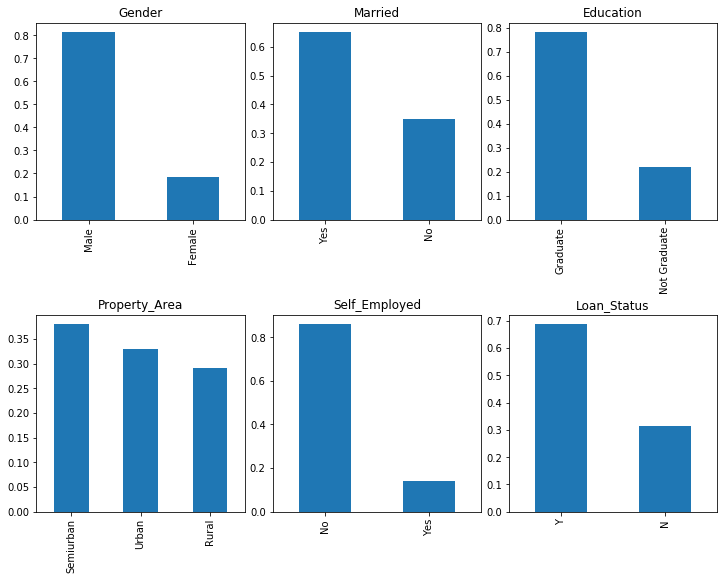

In [7]:
plt.subplot(231)
Train.Gender.value_counts(normalize=True).plot(kind = 'bar', title = "Gender",figsize=(10,8))
plt.tight_layout(pad=0.5)

plt.subplot(232)
Train.Married.value_counts(normalize=True).plot(kind = 'bar', title = "Married")
plt.tight_layout(pad=0.5)

plt.subplot(233)
Train.Education.value_counts(normalize=True).plot(kind = 'bar', title = "Education")
plt.tight_layout(pad=0.5)

plt.subplot(234)
Train.Property_Area.value_counts(normalize=True).plot(kind = 'bar',title = "Property_Area")
plt.tight_layout(pad=0.5)

plt.subplot(235)
Train.Self_Employed.value_counts(normalize=True).plot(kind = 'bar',title = "Self_Employed")
plt.tight_layout(pad=0.5)

plt.subplot(236)
Train.Loan_Status.value_counts(normalize=True).plot(kind = 'bar',title = "Loan_Status")
plt.tight_layout(pad=0.5)

**Findings from Univariate analysis of categorical variables :**
* 80% of loan applicants are from male in the training dataset.
* Nearly 70% are married
* About 75% of loan applicants are graduates
* Highest number of applicants are from Semiurban areas, followed by urban areas.
* Nearly 85-90% loan applicants are self employed
* Loan has been approved for more than 65% of applicants.

In [8]:
Train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Dependents field can be considered as categorical or ordinal, since the data is clearly divided into 4 categories : 0, 1, 2, 3+. Let's have a look the bar chart. Almost 58% of the applicants have no dependents.

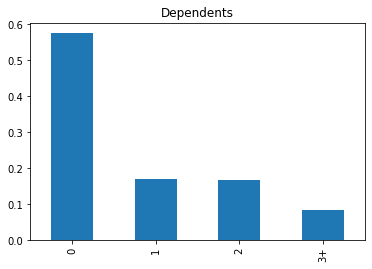

In [9]:
Train.Dependents.value_counts(normalize = True).plot(kind='bar',title="Dependents")

**Numerical or Continous Variables :** Numerical variables are those that can take up any value within the given range. For example, applicantIncome, CoapplicantIncome, Loan_Term, Loan_Amount, Credit_History

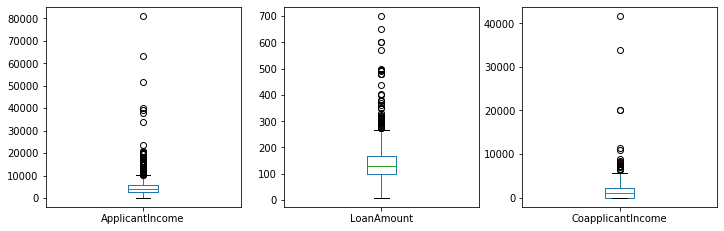

In [10]:
#bins = np.linspace(Train.ApplicantIncome.min(),Train.ApplicantIncome.max(),10)
plt.subplot(231)
Train['ApplicantIncome'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)

plt.subplot(232)
Train['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(233)
Train['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

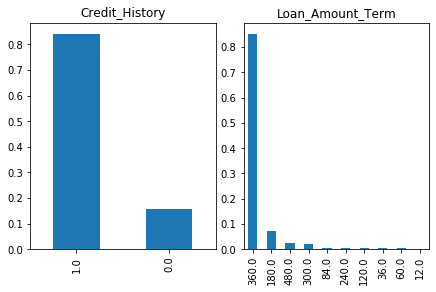

In [11]:
plt.subplot(121)
Train.Credit_History.value_counts(normalize = 'True').plot(kind = 'bar', title='Credit_History')
plt.tight_layout(pad=0.5)

plt.subplot(122)
Train.Loan_Amount_Term.value_counts(normalize = 'True').plot(kind = 'bar', title='Loan_Amount_Term')
plt.tight_layout(pad=0.5)

**Conclusions from univariate analysis of continous variables.**
* 80% of applicants have credit history of 1
* More than 80% of loans are taken for 360 days or above.
* The applicantIncome is mostly between 10000-40000 with some outliers.
* CoapplicantIncome is lesser than applicantIncome and is within the 5000-15000, with some outliers.
* Loan Amount is mostly concentrated between 300-500.
* We might have to remove outliers from applicantIncome and CoapplicantIncome. But for that we need to find reasons for outliers.

**Bivariate Analysis :** Bivariate analysis is basically finding some kind of emperical relationship between two variables. Let's say ApplicantIncome and Loan_Status. Before performing any kind of analysis, we must create an hypothesis.This hypothesis will act as a guiding light, where to look and analyse.

For the purpose of this analysis, I have the following **hypothesis** in my mind.
* Applicants with higher income might have more chances of getting their loans approved.
* Applicants with less number of dependents higher coapplicantIncome might have more chances of getting loan approvals.
* Applicants who are graduates, tend to earn more and hence have higher loan approval rates.
* Applicants who are married, might seem more responsible hence higher loan approval chances.
* Applicants who are not self-employed, might have a higher chances of loan approval as they tend to have constant source of income. There is less uncertainity, I would say.
* Candidates with property in urban areas might have higher chances of loan approval, since the cost of collateral would be high.
* Good credit history should definitely correlate with loan approval.
* For Gender, I don't have any specific thing in my mind but let's say women tend to be more responsible and hence high approval rates. (P.S. Not a feminist)

Now, let's check if this hypothesis, is correct or not for this dataset.

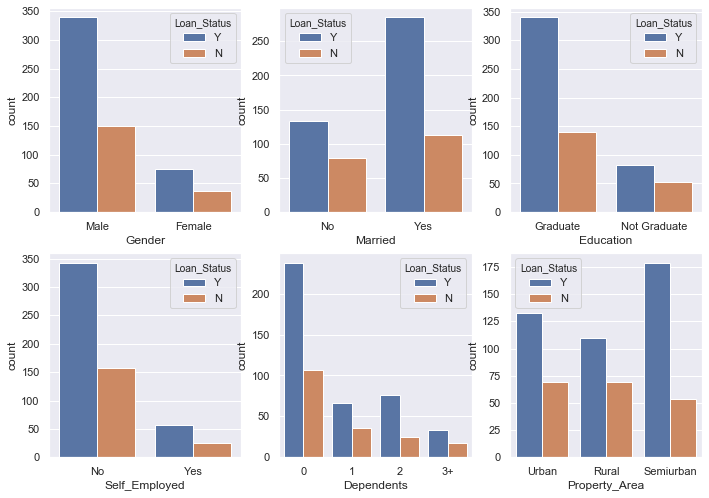

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Gender", hue='Loan_Status', data=Train)
plt.subplot(232)
sns.countplot(x="Married", hue='Loan_Status', data=Train)
plt.subplot(233)
sns.countplot(x="Education", hue='Loan_Status', data=Train)
plt.subplot(234)
sns.countplot(x="Self_Employed", hue='Loan_Status', data=Train)
plt.subplot(235)
sns.countplot(x="Dependents", hue='Loan_Status', data=Train)
plt.subplot(236)
sns.countplot(x="Property_Area", hue='Loan_Status', data=Train)

**Insights :** 
* There is not a substantial difference between male and female approval rates.
* Married applicants have a slightly higher chances of loan approval.
* Graduates have higher chance of loan approval compared to non-graduates.
* Self_Employed employees have slightly lower chances of loan approval but the situation is not that bad.
* Applicants with no dependents or 2 dependents have higher chances of approval. But this does not correlate well.
* Applicants with properties in semi-urban areas have higher loan approval rates.

**Multivariate Analysis :** A multivariate analysis involves finding relationship between more than two variables. 

**Hypothesis :**
* An applicant who is a graduate, will have more income and hence might have higher changes of getting loan approval.
* Likewise we will try to figure out relationship between the variables in pair of three or more.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


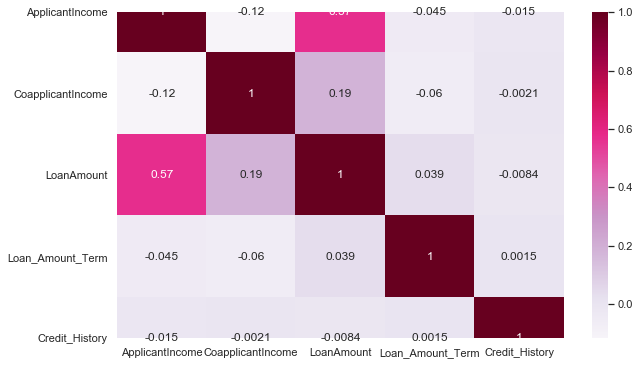

In [13]:
matrix = Train.corr()
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(matrix, vmax=1,cmap="PuRd",annot=True)

matrix


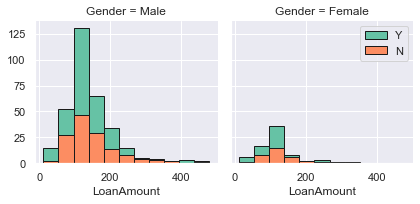

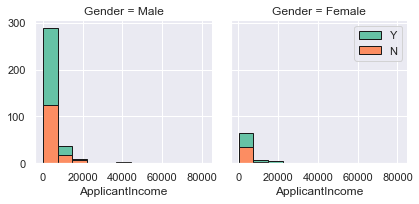

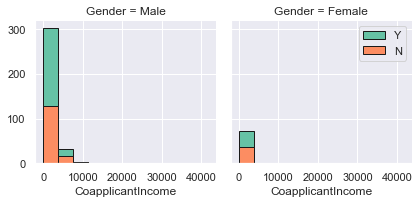

In [14]:
bins = np.linspace(Train.Loan_Amount_Term.min(), Train.Loan_Amount_Term.max(),12)
graph = sns.FacetGrid(Train, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

bins = np.linspace(Train.ApplicantIncome.min(), Train.ApplicantIncome.max(),12)
graph = sns.FacetGrid(Train, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

bins = np.linspace(Train.CoapplicantIncome.min(), Train.CoapplicantIncome.max(),12)
graph = sns.FacetGrid(Train, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'CoapplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

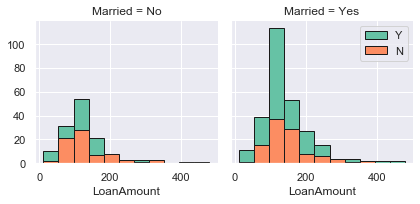

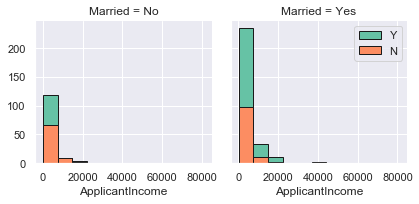

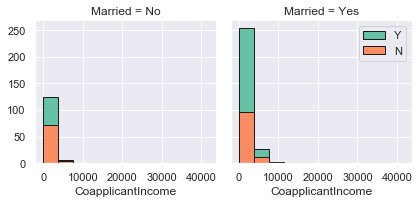

In [15]:
bins = np.linspace(Train.Loan_Amount_Term.min(), Train.Loan_Amount_Term.max(),12)
graph = sns.FacetGrid(Train, col="Married", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins, ec="k")

graph.axes[-1].legend()
plt.show()

bins = np.linspace(Train.ApplicantIncome.min(), Train.ApplicantIncome.max(),12)
graph = sns.FacetGrid(Train, col="Married", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()


bins = np.linspace(Train.CoapplicantIncome.min(), Train.CoapplicantIncome.max(),12)
graph = sns.FacetGrid(Train, col="Married", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'CoapplicantIncome', bins=bins, ec="k")

graph.axes[-1].legend()
plt.show()